In [0]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [0]:
df=pd.read_csv("framingham.csv")
df.shape

(4240, 16)

In [0]:
df.info()
#AS PER THE INFO ALL VARIABLES ARE SCALE VARIABLES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [0]:
pd.isnull(df).sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
#AS per the data,education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose have missing variables
import pandas_profiling
eda_report_heart=pandas_profiling.ProfileReport(df)
eda_report_heart
eda_report_heart.to_file("eda_report_heart.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,16
Number of observations,4240
Total Missing (%),1.0%
Total size in memory,530.1 KiB
Average record size in memory,128.0 B
Numeric,10
Categorical,0
Boolean,6
Date,0
Text (Unique),0
Rejected,0


In [0]:
"""education has 105 / 2.5% missing values Missing
cigsPerDay has 2145 / 50.6% zeros Zeros
BPMeds has 53 / 1.2% missing values Missing
BPMeds has 4063 / 95.8% zeros Zeros
totChol has 50 / 1.2% missing values Missing
glucose has 388 / 9.2% missing values Missing
BPMeds has two values---either 0.0 or 0.1 ,so we will take mode to replace missing values for BPMeds 
we will use mean to replace missing values for other variables"""
#REPLACING MISSING VALUES 
df['totChol'].fillna(df.totChol.mean(),inplace=True)
df['BMI'].fillna(df.BMI.mean(),inplace=True)
df['glucose'].fillna(df.glucose.mean(),inplace=True)
df['cigsPerDay'].fillna(df.cigsPerDay.mean(),inplace=True)
df['BPMeds'].fillna(df.BPMeds.mode()[0],inplace=True)
df['heartRate'].fillna(df.heartRate.mean(),inplace=True)
pd.isnull(df).sum()

'education has 105 / 2.5% missing values Missing\ncigsPerDay has 2145 / 50.6% zeros Zeros\nBPMeds has 53 / 1.2% missing values Missing\nBPMeds has 4063 / 95.8% zeros Zeros\ntotChol has 50 / 1.2% missing values Missing\nglucose has 388 / 9.2% missing values Missing\nBPMeds has two values---either 0.0 or 0.1 ,so we will take mode to replace missing values for BPMeds \nwe will use mean to replace missing values for other variables'

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

0    3596
1     644
Name: TenYearCHD, dtype: int64

"we can see that for the Target variable i.e. TenYearCHD,we have 0's count  as 3596 and 1's count as 644.\nso Building the model our recall values for 1 may be negligibly lower compared to recall values for 0.so in order to balance\nwe may need to apply optimization techniques using probabliries such that recall values imprived for 1."

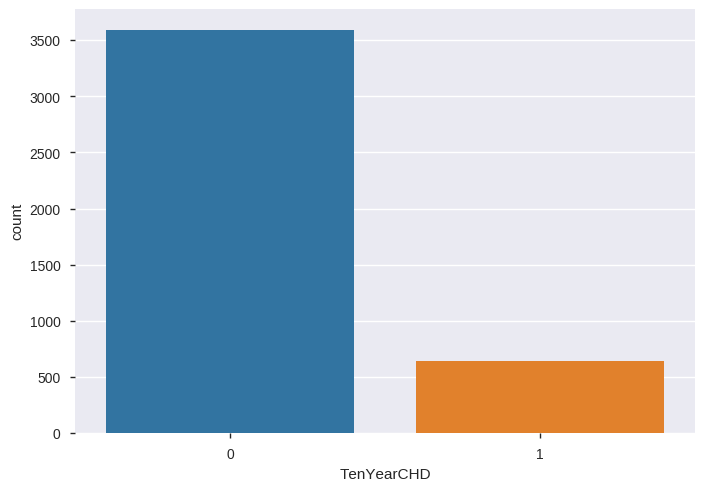

In [0]:
#PLOTTING BOX PLOT AND DETERMINING TRUE AND FALSE VALUES FOR CHD
df.TenYearCHD.value_counts()
sns.countplot(x='TenYearCHD',data=df)
"""we can see that for the Target variable i.e. TenYearCHD,we have 0's count  as 3596 and 1's count as 644.
so Building the model our recall values for 1 may be negligibly lower compared to recall values for 0.so in order to balance
we may need to apply optimization techniques using probabliries such that recall values imprived for 1."""

In [0]:
"""DROPPING EDUCATION VARIABLES
we will drop education variable from our modelling Input as 
education will not have any impact on Target i.e. TenYearCHD
Accordingly we will seperate Independent variables and group them in x dataframe and 
target variable in Y dataframe"""
df.drop(['education'],axis=1,inplace=True)
pd.isnull(df).sum()
x=df.iloc[:,:-1]
x.head()
x.describe()
y=df.iloc[:,-1]
y.head()
y.describe()

'DROPPING EDUCATION VARIABLES\nwe will drop education variable from our modelling Input as \neducation will not have any impact on Target i.e. TenYearCHD\nAccordingly we will seperate Independent variables and group them in x dataframe and \ntarget variable in Y dataframe'

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005937,0.029245,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655
std,0.495027,8.572942,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

count    4240.000000
mean        0.151887
std         0.358953
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: TenYearCHD, dtype: float64

In [0]:
x.head()
y.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [0]:
#APPLYING LOGISTIC REGRESSION USING statsmodels.api
import statsmodels.api as sm
model=sm.Logit(y,x)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.399028
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4226
Method:                           MLE   Df Model:                           13
Date:                Sat, 25 Jan 2020   Pseudo R-squ.:                 0.06325
Time:                        17:20:53   Log-Likelihood:                -1691.9
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.869e-41
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.3634      0.097      3.754      0.000       0.174       0.553
age                 0.0292      0.005      5.356      0.000       0.019       0.040
currentSmoker      -0.2663      0.141     -1.895      0.058      -0.542       0.009
cigsPerDay          0.0232      0.006      4.095      0.000       0.012       0.034
BPMeds              0.3982      0.216      1.845      0.065      -0.025       0.821
prevalentStroke     0.9205      0.436      2.112      0.035       0.066       1.775
prevalentHyp        0.9556      0.115      8.320      0.000       0.731       1.181
diabetes            0.9124      0.275      3.317      0.001       0.373       1.452
totChol            -0.0018      0.001     -1.728      0.084      -0.004       0.000
sysBP               0.0122      0.004      3.461      0.001       0.005       0.019
diaBP              -0.0275      0.006     -4.878      0.000      -0.039      -0.016
BMI                -0.0500      0.011     -4.352      0.000      -0.072      -0.027
heartRate          -0.0208      0.004     -5.676      0.000      -0.028      -0.014
glucose             0.0010      0.002      0.487      0.626      -0.003       0.005
===================================================================================
"""

In [0]:
#SELECTING VARIABLES BASED ON P-VALUE AS PER NULL HYPOTHESIS TESTING
new_features=df[['male','age','cigsPerDay','prevalentStroke','prevalentHyp','diabetes','sysBP','diaBP','BMI','heartRate','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus

In [0]:
"""
1)criterion : {"gini", "entropy"}, default="gini"
 The function to measure the quality of a split. Supported criteria are"gini" 
 for the Gini impurity and "entropy" for the information gain.
2)max_depth : int, default=None
 The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than
 min_samples_split samples.
3)random_state : int or RandomState, default=None
 If int, random_state is the seed used by the random number generator;
 If RandomState instance, random_state is the random number generator;
 If None, the random number generator is the RandomState instance used by `np.random`.
4)class_weight : dict, list of dict or "balanced", default=None
 Weights associated with classes in the form ``{class_label: weight}``.
 If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same 
 order as the columns of y.
 Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. 
we will exclusively modify these input parameters to find their impact on Modelling.however we will keep using other input 
variables with their implicit default values for time being as such"""
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
train_x1,test_x1,train_y1,test_y1=train_test_split(x,y,test_size=0.30,random_state=0)
#CREATE DECISION TREE CLASSIFIER OBJECT
decisiontree1=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=3,class_weight=None)
#TRAIN MODEL
model=decisiontree1.fit(train_x1,train_y1)
model
classes1=decisiontree1.predict(test_x1)

'\n1)criterion : {"gini", "entropy"}, default="gini"\n The function to measure the quality of a split. Supported criteria are"gini" \n for the Gini impurity and "entropy" for the information gain.\n2)max_depth : int, default=None\n The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than\n min_samples_split samples.\n3)random_state : int or RandomState, default=None\n If int, random_state is the seed used by the random number generator;\n If RandomState instance, random_state is the random number generator;\n If None, the random number generator is the RandomState instance used by `np.random`.\n4)class_weight : dict, list of dict or "balanced", default=None\n Weights associated with classes in the form ``{class_label: weight}``.\n If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same \n order as the columns of y.\n Note that for multioutput (incl

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

0.5036985054244747

ACCUIRACY SCORE
0.8380503144654088
precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1076
           1       0.22      0.02      0.04       196

    accuracy                           0.84      1272
   macro avg       0.53      0.50      0.47      1272
weighted avg       0.75      0.84      0.78      1272

CONFUSION MATRIX


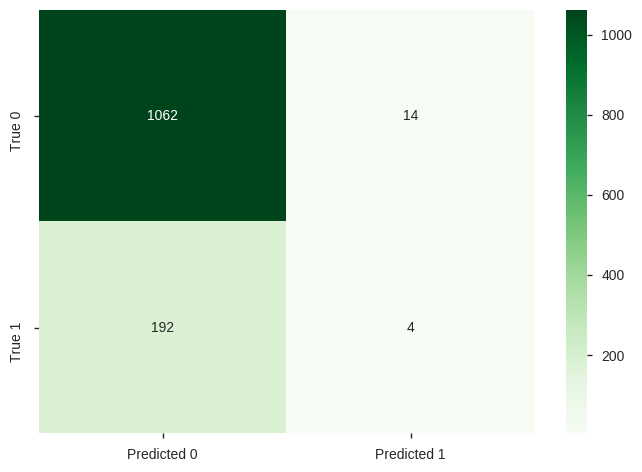

In [0]:
auc=metrics.roc_auc_score(test_y1,classes1)
auc
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y1,classes1))
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y1,classes1))
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y1,classes1)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()
#HERE MODEL ACCURACY IS 85% BUT RECALL FOR 1 IS 0.LET US TWEAK THE MODEL PARAMETERS AND BUILD THE MODEL AGAIN.

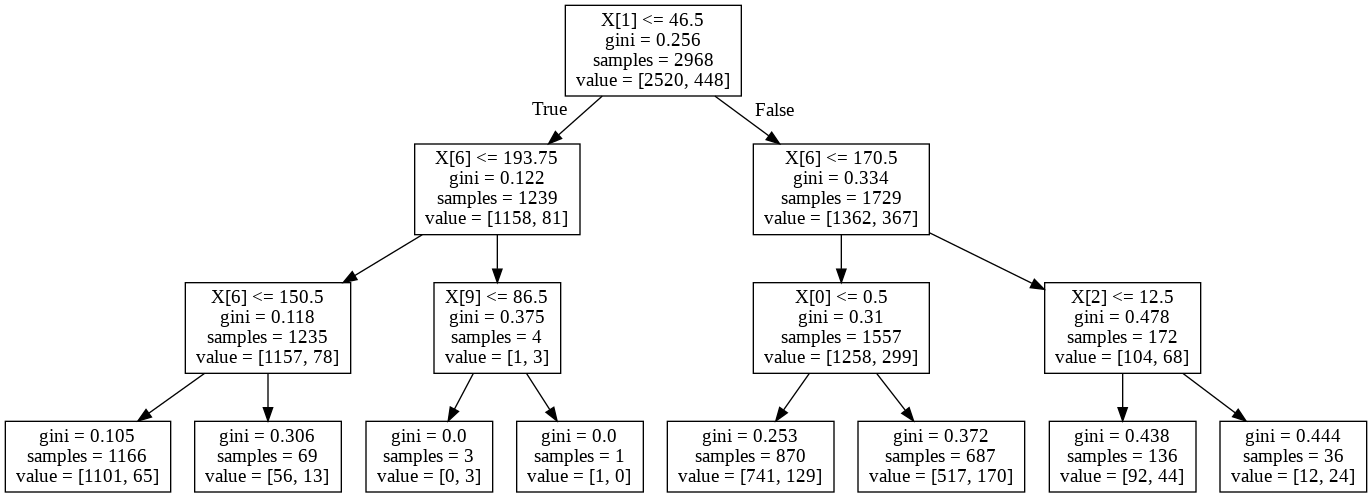

In [0]:
#CREATE DOT DATA
dot_data=tree.export_graphviz(decisiontree1,out_file=None)
#draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
#show graph
from IPython.display import Image
Image(graph.create_png())

In [0]:
#we will also split our data into train and test datasets and Build the model on train dataset and apply the model on test datset.
train_x2,test_x2,train_y2,test_y2=train_test_split(x,y,test_size=0.30,random_state=0)
#let us tweak the Model Parameters and Build the model once again by changing class_weight : "balanced"
decisiontree2=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=3,class_weight="balanced")
#TRAIN MODEL
model=decisiontree2.fit(train_x2,train_y2)
model
classes2=decisiontree2.predict(test_x2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

0.6527387906835596

ACCUIRACY SCORE
0.6525157232704403
precision/recall Metrics
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1076
           1       0.25      0.65      0.37       196

    accuracy                           0.65      1272
   macro avg       0.58      0.65      0.56      1272
weighted avg       0.81      0.65      0.70      1272

CONFUSION MATRIX


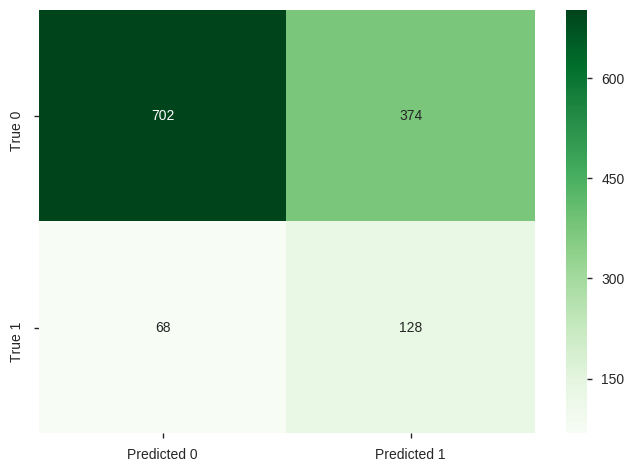

In [0]:
auc=metrics.roc_auc_score(test_y2,classes2)
auc
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y2,classes2))
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y2,classes2))
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y2,classes2)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

#OPTIMIZING PRECISION AND RECALL for 0 and 1 was achieved  by changing class_weight : "balanced"

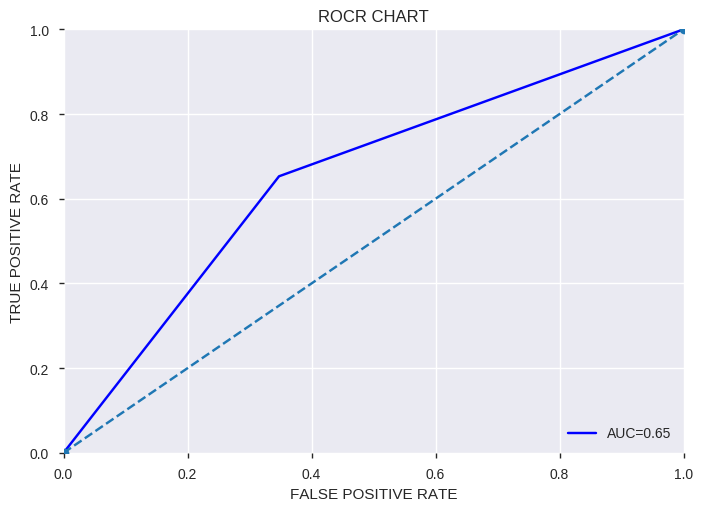

In [0]:
#ROC CHART
fpr,tpr,th=roc_curve(test_y2,classes2)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("ROCR CHART")
plt.plot(fpr,tpr,'b',label="AUC=%0.2F"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"o--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.show();

In [0]:
train_x3,test_x3,train_y3,test_y3=train_test_split(x,y,test_size=0.30,random_state=0)
#let us tweak the Model Parameters and Build the model once again
decisiontree3=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
#TRAIN MODEL
model=decisiontree3.fit(train_x3,train_y3)
model
classes3=decisiontree3.predict(test_x3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
auc=metrics.roc_auc_score(test_y3,classes3)
auc

0.5036985054244747

In [0]:
#CREATE DOT DATA
dot_data=tree.export_graphviz(decisiontree3,out_file=None)
#draw graph
graph=pydotplus.graph_from_dot_data(dot_data)
#create pdf file
graph.write_pdf("CHD.pdf")
#create png file
graph.write_png("CHD.png")

True

True

In [0]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y3,classes3))

ACCUIRACY SCORE
0.8380503144654088


In [0]:
#PRECISION RECALL MATRIX
print("precision/recall Metrics")
print(metrics.classification_report(test_y3,classes3))

precision/recall Metrics
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1076
           1       0.22      0.02      0.04       196

    accuracy                           0.84      1272
   macro avg       0.53      0.50      0.47      1272
weighted avg       0.75      0.84      0.78      1272



CONFUSION MATRIX


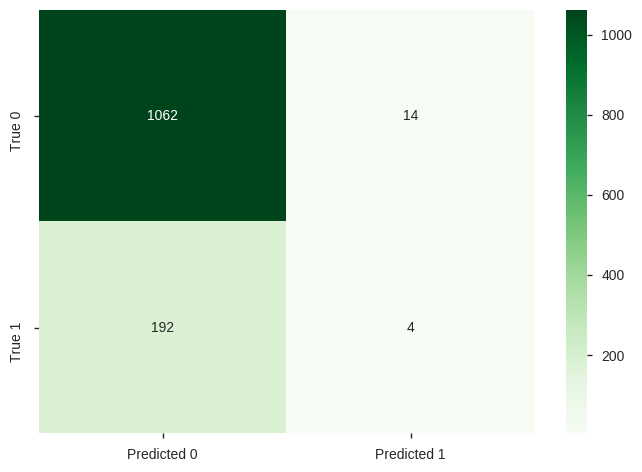

In [0]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y3,classes3)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [0]:
#FIND OUT PROBABLITY of THE CLASSES AND PREDICTED CLASSES
predicted_prob=model.predict_proba(test_x3)
predicted_prob_df=pd.DataFrame(predicted_prob)
predicted_classes_df=pd.DataFrame(classes3)
predicted_df=pd.concat([predicted_prob_df,predicted_classes_df],axis=1)
predicted_df.columns=['prob_0','prob_1','class']
predicted_df.sample(10)

,prob_0,prob_1,class
337,0.752547,0.247453,0
275,0.944254,0.055746,0
338,0.752547,0.247453,0
298,0.851724,0.148276,0
81,0.851724,0.148276,0
527,0.752547,0.247453,0
692,0.944254,0.055746,0
568,0.752547,0.247453,0
1207,0.752547,0.247453,0
302,0.752547,0.247453,0


In [0]:
predicted_df.groupby('class').size()

class
0    1254
1      18
dtype: int64

In [0]:
#APPLY NEW THRESHOLD FOR OPTIMIZING PRECISION AND RECALL
new_y_test=predicted_prob[:,1]>=0.20
print(metrics.classification_report(test_y3,new_y_test))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1076
           1       0.27      0.48      0.35       196

    accuracy                           0.72      1272
   macro avg       0.58      0.62      0.58      1272
weighted avg       0.80      0.72      0.75      1272



In [0]:
#AUC
print("AUC")
auc=metrics.roc_auc_score(test_y3,new_y_test)
auc

AUC


0.6238525149836887

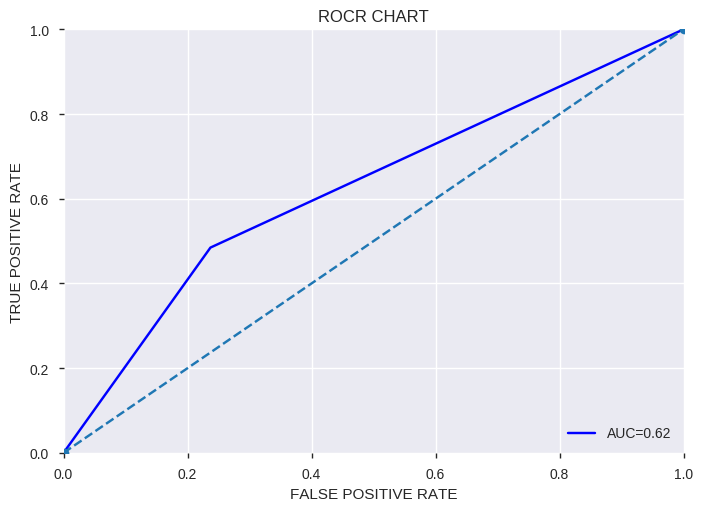

In [0]:
#ROC CHART
fpr,tpr,th=roc_curve(test_y3,new_y_test)
roc_auc=metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title("ROCR CHART")
plt.plot(fpr,tpr,'b',label="AUC=%0.2F"%roc_auc)
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],"o--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("TRUE POSITIVE RATE")
plt.xlabel("FALSE POSITIVE RATE")
plt.show();

In [0]:
#ACCUIRACY SCORE
print("ACCUIRACY SCORE")
print(metrics.accuracy_score(test_y3,new_y_test))

ACCUIRACY SCORE
0.720125786163522


CONFUSION MATRIX


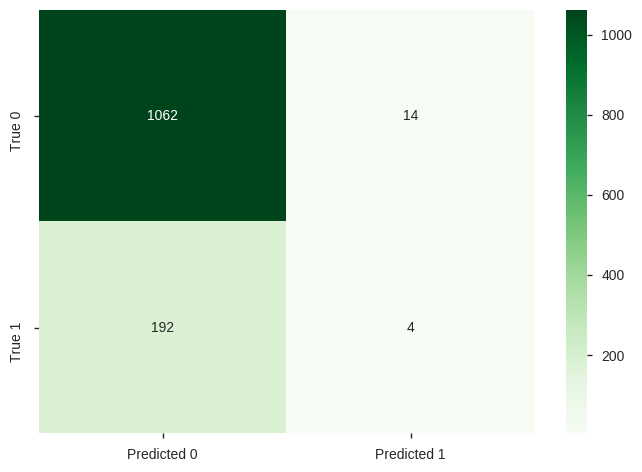

In [0]:
#CONFUSION MATRIX
print("CONFUSION MATRIX")
cf=metrics.confusion_matrix(test_y3,classes3)
lbl1=["Predicted 0","Predicted 1"]
lbl2=["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show()